# Name: V Raghav Anand

# Register Number: 19BCE1415

# Machine Learning Lab (CSE4020)

# Faculty: Prof. Abdul Quadir MD

# K-CROSS VALIDATION AND STACKING

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Reading a dataset

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Dropping unnecessary column (userID)

In [3]:
df=dataset.drop('User ID',axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## Pairplot analysis

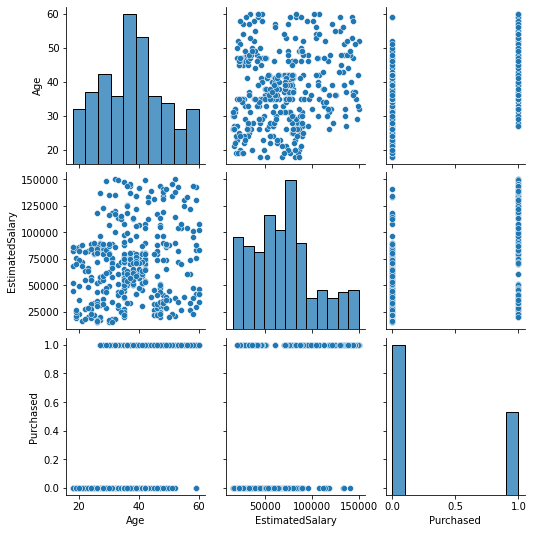

In [4]:
import seaborn as sb
sb.pairplot(df)

## Replacing categorical variables with numeric values

In [5]:
gender = df['Gender'].tolist()
gender=set(gender)
gender_set={}
temp=1
for i in gender:
    gender_set[i]=temp
    temp+=1
df.Gender = [gender_set[item] for item in df.Gender]
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


## Splitting dependent and Independent variables

In [6]:
x=df.iloc[:,0:3].values
y=df.iloc[:,-1].values

In [7]:
x

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    2,    26, 43000],
       ...,
       [    2,    50, 20000],
       [    1,    36, 33000],
       [    2,    49, 36000]], dtype=int64)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# Stacking 

## Splitting into test, train data and training it on KNN, Naive Bayes

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Accuracy obtained on KNN classification is 78.7%

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7875

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [15]:
gnb.fit(x_train,y_train)

GaussianNB()

In [16]:
y_pred=gnb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Accuracy obtained on Naive Bayes classification is 92.5%

In [17]:
accuracy_score(y_test,y_pred)

0.925

## Applying stacking and choosing Meta Classifier as Logistic Regression

In [18]:
knn=KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
est = [('knn',KNeighborsClassifier(n_neighbors=3)), ('nb',GaussianNB())]
clf = StackingClassifier(estimators=est,final_estimator=LogisticRegression())

In [19]:
clf

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [20]:
clf.fit(x_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [21]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
accuracy_score(y_test,y_pred)

0.95

## We see that the accuracy obtained after stacking (95%) is greater than the accuracy obtained when testing individually on KNN (78.7%) and Naive Bayes(92.5%)

In [23]:
from sklearn.model_selection import cross_val_score

## Using K-Cross validation with K values taken as 3,7,10

In [24]:
scores_knn=[]
for i in [3,7,10]:
    cv_scores=cross_val_score(knn,x,y,cv=i)
    print('K-Foldwise validation accuracies:',cv_scores)
    print('Average accuracy:',np.mean(cv_scores))
    scores_knn.append(np.mean(cv_scores))

K-Foldwise validation accuracies: [0.80597015 0.78947368 0.66917293]
Average accuracy: 0.7548722552650281
K-Foldwise validation accuracies: [0.81034483 0.8245614  0.92982456 0.75438596 0.68421053 0.78947368
 0.68421053]
Average accuracy: 0.7824302134646962
K-Foldwise validation accuracies: [0.75  0.825 0.875 0.95  0.875 0.7   0.65  0.8   0.7   0.775]
Average accuracy: 0.7900000000000001


## Applying K-Cross validation on KNN algorithm and visualizing accuracy using plots

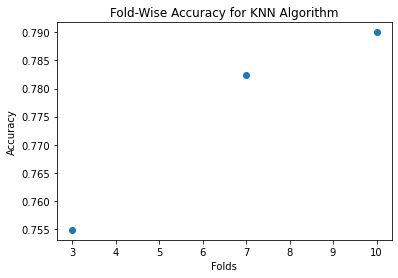

In [25]:
plt.scatter([3,7,10],scores_knn)
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.title('Fold-Wise Accuracy for KNN Algorithm')
plt.show()

## Applying K-Cross validation on Naive Bayes algorithm and visualizing using plots

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
scores_nb=[]
for i in [3,7,10]:
    cv_scores=cross_val_score(gnb,x,y,cv=i)
    print('Cross validation accuracy measures: ',cv_scores)
    print('Average accuracy: ',np.mean(cv_scores))
    scores_nb.append(np.mean(cv_scores))

Cross validation accuracy measures:  [0.89552239 0.93233083 0.7593985 ]
Average accuracy:  0.8624172371226574
Cross validation accuracy measures:  [0.81034483 0.89473684 0.98245614 0.9122807  0.80701754 0.84210526
 0.89473684]
Average accuracy:  0.8776683087027913
Cross validation accuracy measures:  [0.8   0.775 0.95  0.975 1.    0.875 0.775 0.8   0.875 0.925]
Average accuracy:  0.875


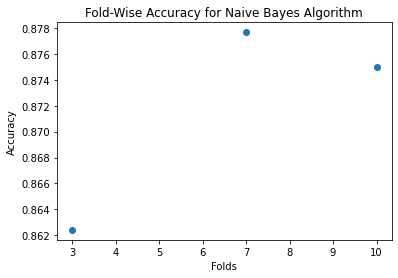

In [27]:
plt.scatter([3,7,10],scores_nb)
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.title('Fold-Wise Accuracy for Naive Bayes Algorithm')
plt.show()

## Visualization of accuracy on applying K-cross validation after stacking

In [28]:
scores_stack=[]
for i in [3,7,10]:
    cv_scores=cross_val_score(clf,x,y,cv=i)
    print('Cross validation accuracy measures: ',cv_scores)
    print('Average accuracy: ',np.mean(cv_scores))
    scores_stack.append(np.mean(cv_scores))

Cross validation accuracy measures:  [0.88059701 0.93233083 0.81203008]
Average accuracy:  0.8749859723936707
Cross validation accuracy measures:  [0.75862069 0.87719298 0.96491228 0.92982456 0.84210526 0.8245614
 0.84210526]
Average accuracy:  0.8627603491487339
Cross validation accuracy measures:  [0.775 0.775 0.925 0.95  1.    0.9   0.825 0.825 0.825 0.9  ]
Average accuracy:  0.8699999999999999


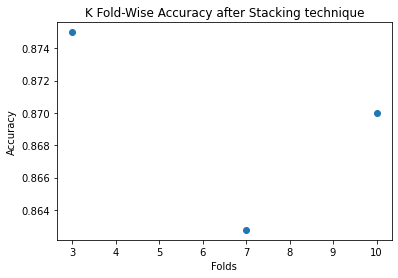

In [29]:
plt.scatter([3,7,10],scores_stack)
plt.title('K Fold-Wise Accuracy after Stacking technique')
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.show()